<a href="https://colab.research.google.com/github/umesh03B/ma22c048_2023_PL/blob/main/Assignment/Assignment_11/Insurance_company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from scipy.sparse import diags, eye
from scipy.sparse.linalg import spsolve
from scipy.sparse import csr_matrix

In [3]:
from scipy.sparse import diags, eye
from scipy.sparse.linalg import spsolve
from scipy.sparse import csr_matrix, csc_matrix

In [4]:
def sparseGmats(p=0.54, N=10000):
  q = 1 - p
  # Note that the first and last row of P are not accurate
  # in this construction, but we're going to trim them away:
  P = diags(q*np.ones(N), offsets=-1, shape=(N+1, N+1),format='dia') \
  + diags(p*np.ones(N), offsets=1, shape=(N+1, N+1),format='dia')
  A = [0, N]
  B = list(range(1, N))
  P = csc_matrix(P)
  I_PBB = (eye(N-1, format='csc') - P[np.ix_(B, B)]).tocsc()
  PBA = P[np.ix_(B, A)].tocsc()
  return I_PBB, PBA
def ruinG(p=0.54, N=10000):
  """ Given that the winning probability of each game is "p",
  compute the probability of G's ruin for each starting state """
  I_PBB, PBA = sparseGmats(p, N)
  return spsolve(I_PBB, PBA[:, 0])

In [5]:
ruinG(N=10)

array([0.81453525, 0.65654676, 0.52196397, 0.40731937, 0.30965916,
       0.22646712, 0.15559984, 0.09523141, 0.04380645])

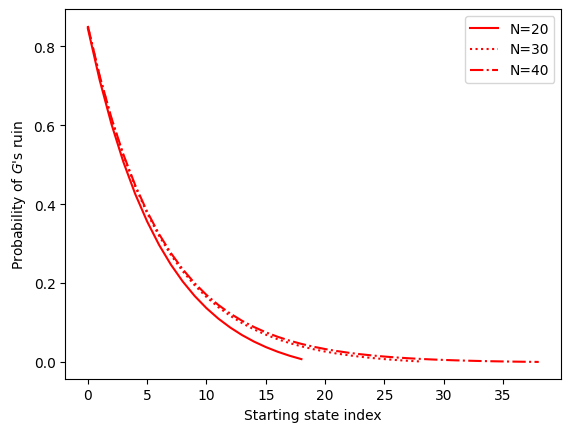

In [6]:
fig = plt.figure()
ax = plt.gca()
hs = ruinG(N=20)
ax.plot(hs[:21], 'r-', label='N=20')
hs = ruinG(N=30)
ax.plot(hs, 'r:', label='N=30')
hs = ruinG(N=40)
ax.plot(hs, 'r-.', label='N=40')
ax.set_ylabel('Probability of $G$\'s ruin')
ax.set_xlabel('Starting state index')
ax.legend();

In [7]:
hs

array([8.51608647e-01, 7.25201199e-01, 6.17520780e-01, 5.25793015e-01,
       4.47654549e-01, 3.81092153e-01, 3.24390851e-01, 2.76089743e-01,
       2.34944355e-01, 1.99894579e-01, 1.70037363e-01, 1.44603438e-01,
       1.22937502e-01, 1.04481334e-01, 8.87594138e-02, 7.53666666e-02,
       6.39580301e-02, 5.42395619e-02, 4.59608668e-02, 3.89086451e-02,
       3.29011970e-02, 2.77837411e-02, 2.34244269e-02, 1.97109370e-02,
       1.65475938e-02, 1.38528940e-02, 1.15574090e-02, 9.60199582e-03,
       7.93627350e-03, 6.51732485e-03, 5.30859082e-03, 4.27892850e-03,
       3.40180874e-03, 2.65463266e-03, 2.01814932e-03, 1.47595981e-03,
       1.01409468e-03, 6.20654008e-04, 2.85500844e-04])

In [8]:
1.47595981e-03 - 0.1
j=0
for i in hs:

  if (i-0.1<= 1e-15):
    break
  j+=1
j

14

In [9]:
def find_prob(hs):
  j=0
  for i in hs:

    if (i-0.1<= 1e-15):
      break
    j+=1
  return j

In [10]:
def plot_prob(n):
  fig = plt.figure()
  for i in range(1,n+1):

    ax = plt.gca()
    hs = ruinG(N=i*10)
    pr = find_prob(hs)
    ax.scatter(pr,i*10)
  ax.set_xlabel('Probability of $G$\'s ruin')
  ax.set_ylabel('Starting state index')
  ax.legend();

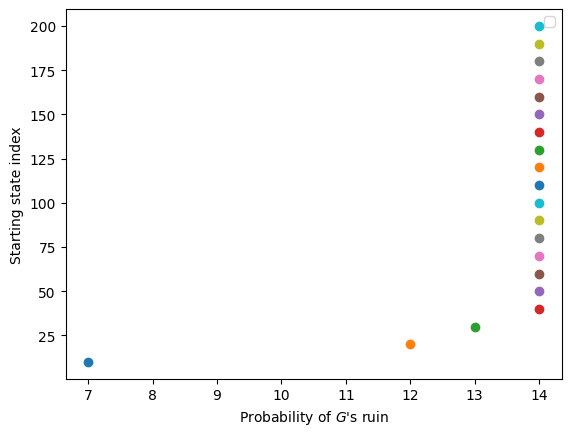

In [12]:
plot_prob(20)

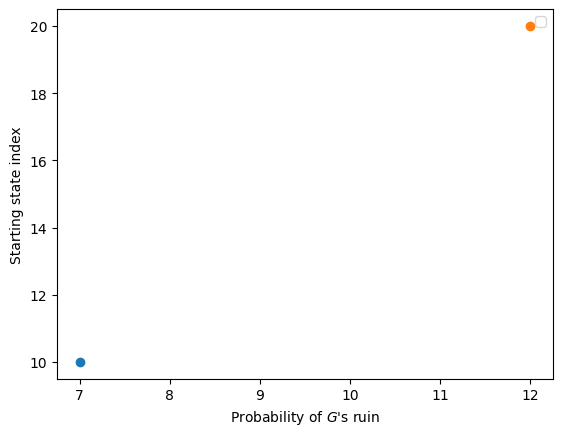

In [13]:
# What should be the company’s reserve in order to make the probability of the
# company’s ruin less than 0.1%  is 14
plot_prob(2)

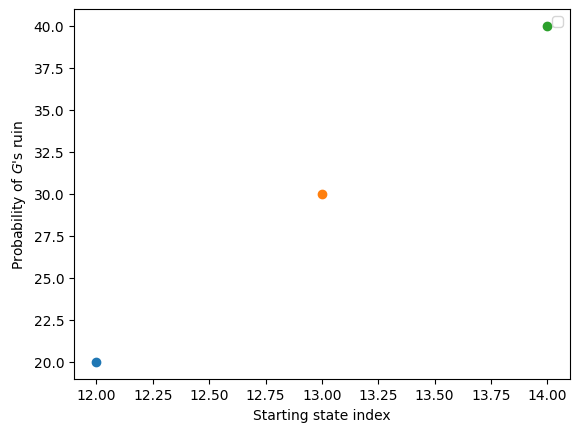

In [14]:
fig = plt.figure()
ax = plt.gca()
hs = ruinG(N=20)
# ax.plot(hs[:21], 'r-', label='N=20')
pr = find_prob(hs)
ax.scatter(pr,20)
hs = ruinG(N=30)
pr = find_prob(hs)
ax.scatter(pr,30)
# ax.plot(hs, 'r:', label='N=30')
hs = ruinG(N=40)
pr = find_prob(hs)
ax.scatter(pr,40)
# ax.plot(hs, 'r-.', label='N=40')
ax.set_ylabel('Probability of $G$\'s ruin')
ax.set_xlabel('Starting state index')
ax.legend();

In [15]:
def probability_of_ruin(R, p, q):
    if R <= 0:
        return 1
    if R >= 1000:  # Assuming the company won't stop if the reserve becomes very high
        return 0
    return q * probability_of_ruin(R - 200, p, q) + p * probability_of_ruin(R + 100, p, q)

initial_reserve = 1000
p = 1 - 0.46
q = 0.46

probability_ruin = probability_of_ruin(initial_reserve, p, q)
print(f"Probability of ruin: {probability_ruin:.4f}")


Probability of ruin: 0.0000


In [16]:
def find_required_reserve(p, q, target_probability):
    R = 1000
    while True:
        probability_ruin = probability_of_ruin(R, p, q)
        if probability_ruin < target_probability:
            return R
        R += 100  # Increment the reserve by $100

target_probability = 0.001  # 0.1%
required_reserve = find_required_reserve(p, q, target_probability)
print(f"Required reserve for P(ruin) < 0.1%: ${required_reserve}")

Required reserve for P(ruin) < 0.1%: $1000
